In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics
import sklearn.model_selection
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords # Importing list of stop words from nltk
from string import punctuation # Importing list of punctuations from string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package wordnet to /home/melio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/melio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/melio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
stopwords = stopwords.words('english')
tokenizer = RegexpTokenizer("[\w']+")
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
train_df=pd.read_csv('classifying-20-newsgroups/classifying-20-newsgroups/train.csv')
train_df=train_df.drop(['id'],axis=1)
train_df

,message,topic
0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \r...,13
11310,From: ebodin@pearl.tufts.edu\r\nSubject: Scree...,4
11311,From: westes@netcom.com (Will Estes)\r\nSubjec...,3
11312,From: steve@hcrlgw (Steven Collins)\r\nSubject...,1


In [4]:
x_train=train_df["message"]
x_train

0        From: lerxst@wam.umd.edu (where's my thing)\r\...
1        From: guykuo@carson.u.washington.edu (Guy Kuo)...
2        From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3        From: jgreen@amber (Joe Green)\r\nSubject: Re:...
4        From: jcm@head-cfa.harvard.edu (Jonathan McDow...
                               ...                        
11309    From: jim.zisfein@factory.com (Jim Zisfein) \r...
11310    From: ebodin@pearl.tufts.edu\r\nSubject: Scree...
11311    From: westes@netcom.com (Will Estes)\r\nSubjec...
11312    From: steve@hcrlgw (Steven Collins)\r\nSubject...
11313    From: gunning@cco.caltech.edu (Kevin J. Gunnin...
Name: message, Length: 11314, dtype: object

In [5]:
y_train=train_df["topic"]
y_train

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: topic, Length: 11314, dtype: int64

In [6]:
x_test=pd.read_csv('classifying-20-newsgroups/classifying-20-newsgroups/test.csv')
x_test=x_test.drop(['id'],axis=1)
x_test=x_test["message"]
x_test

0       From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...
1       From: Rick Miller <rick@ee.uwm.edu>\r\nSubject...
2       From: mathew <mathew@mantis.co.uk>\r\nSubject:...
3       From: bakken@cs.arizona.edu (Dave Bakken)\r\nS...
4       From: livesey@solntze.wpd.sgi.com (Jon Livesey...
                              ...                        
7527    From: richmond@spiff.Princeton.EDU (Stupendous...
7528    From: smytonj@murr11.alleg.edu (Jim Smyton)\r\...
7529    From: hhenderson@vax.clarku.edu\r\nSubject: RE...
7530    From: b859zam@utarlg.uta.edu \r\nSubject: INTE...
7531    From: adamsj@gtewd.mtv.gtegsc.com\r\nSubject: ...
Name: message, Length: 7532, dtype: object

In [7]:
y_test=pd.read_csv('classifying-20-newsgroups/classifying-20-newsgroups/solution.csv')
y_test=y_test.drop(['Unnamed: 0','id'],axis=1)
y_test

,topic
0,7
1,5
2,0
3,17
4,19
...,...
7527,14
7528,4
7529,9
7530,6


In [8]:
x_train

0        From: lerxst@wam.umd.edu (where's my thing)\r\...
1        From: guykuo@carson.u.washington.edu (Guy Kuo)...
2        From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3        From: jgreen@amber (Joe Green)\r\nSubject: Re:...
4        From: jcm@head-cfa.harvard.edu (Jonathan McDow...
                               ...                        
11309    From: jim.zisfein@factory.com (Jim Zisfein) \r...
11310    From: ebodin@pearl.tufts.edu\r\nSubject: Scree...
11311    From: westes@netcom.com (Will Estes)\r\nSubjec...
11312    From: steve@hcrlgw (Steven Collins)\r\nSubject...
11313    From: gunning@cco.caltech.edu (Kevin J. Gunnin...
Name: message, Length: 11314, dtype: object

In [9]:
def preprocessing(document):
    document = str(document)
    document ="".join([i for i in document if i not in punctuation])
    document = document.lower()
    tokens = tokenizer.tokenize(document)
    tokens = [token for token in tokens if token.isnumeric()==False]
    output = [word for word in tokens if word not in stopwords]
    stemmed_text = [porter_stemmer.stem(word) for word in output]
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in stemmed_text]

    return lemm_text

In [10]:
priors=np.zeros(20,dtype=np.float128)

In [11]:
y_count = y_train.value_counts(sort=False)
y_count

7     594
4     578
1     584
14    593
16    546
13    594
3     590
2     591
8     598
19    377
6     585
0     480
12    591
5     593
10    600
9     597
15    599
17    564
18    465
11    595
Name: topic, dtype: int64

In [12]:
yc=np.zeros(20,dtype=np.float128)
for i in range(0,20):
  yc[i]=y_count[i]
yc

array([480., 584., 591., 590., 578., 593., 585., 594., 598., 597., 600.,
       595., 591., 594., 593., 599., 546., 564., 465., 377.],
      dtype=float128)

In [13]:
for i in range(0, 20):
  priors[i] = yc[i]/y_train.shape[0]
priors

array([0.04242531, 0.05161747, 0.05223617, 0.05214778, 0.05108715,
       0.05241294, 0.05170585, 0.05250133, 0.05285487, 0.05276648,
       0.05303164, 0.05258971, 0.05223617, 0.05250133, 0.05241294,
       0.05294326, 0.04825879, 0.04984974, 0.04109952, 0.03332155],
      dtype=float128)

In [14]:
x_test=x_test.apply(lambda x:preprocessing(x))
x_test

0       [v064mb9kubvmsdccbuffaloedu, neil, b, gandler,...
1       [rick, miller, rickeeuwmedu, subject, xface, o...
2       [mathew, mathewmantiscouk, subject, strong, we...
3       [bakkencsarizonaedu, dave, bakken, subject, sa...
4       [liveseysolntzewpdsgicom, jon, livesey, subjec...
                              ...                        
7527    [richmondspiffprincetonedu, stupend, man, subj...
7528    [smytonjmurr11allegedu, jim, smyton, subject, ...
7529    [hhendersonvaxclarkuedu, subject, game, length...
7530    [b859zamutarlgutaedu, subject, intel, chmo, de...
7531    [adamsjgtewdmtvgtegsccom, subject, homosexu, i...
Name: message, Length: 7532, dtype: object

In [15]:
x_train=x_train.apply(lambda x:preprocessing(x))
x_train

0        [lerxstwamumdedu, where, thing, subject, car, ...
1        [guykuocarsonuwashingtonedu, guy, kuo, subject...
2        [twillisececnpurdueedu, thoma, e, willi, subje...
3        [jgreenamb, joe, green, subject, weitek, p9000...
4        [jcmheadcfaharvardedu, jonathan, mcdowel, subj...
                               ...                        
11309    [jimzisfeinfactorycom, jim, zisfein, subject, ...
11310    [ebodinpearltuftsedu, subject, screen, death, ...
11311    [westesnetcomcom, est, subject, mount, cpu, co...
11312    [stevehcrlgw, steven, collin, subject, sphere,...
11313    [gunningccocaltechedu, kevin, j, gun, subject,...
Name: message, Length: 11314, dtype: object

In [16]:
map={}
#Map to store frequency of each word in every topic

In [17]:
for i in range(0,len(x_train)):
    cur_x=x_train.iloc[i]
    cur_y=y_train.iloc[i]
    map[cur_y]=map.get(cur_y,{})
    for word in cur_x:
        map[cur_y][word]=map[cur_y].get(word,0)+1

In [18]:
tot_words_topic={}
for i in range(0,len(map)):
    for j in map[i]:
        tot_words_topic[i]=tot_words_topic.get(i,0)+map[i][j]
tot_words_topic
#Total words in each topic

{0: 83563,
 1: 75365,
 2: 78956,
 3: 67422,
 4: 58935,
 5: 103772,
 6: 51128,
 7: 72487,
 8: 67832,
 9: 71297,
 10: 95259,
 11: 125561,
 12: 68915,
 13: 97962,
 14: 101880,
 15: 109352,
 16: 105602,
 17: 144849,
 18: 107816,
 19: 68113}

In [19]:
vocab_size=0
for i in map:  
    vocab_size+=sum(map[i].values())
vocab_size
#Total number of words

1756066

In [20]:
y_pred=np.zeros(x_test.shape[0])
for i in range(0,x_test.shape[0]):
    q=np.ones(20,dtype=np.float128)
    cur_x=x_test.iloc[i]
    for j in map:
        q[j]=priors[j]
        for k in cur_x:
            q[j]=q[j]*(map[j].get(k,0)+1)/np.float128(tot_words_topic[j]+vocab_size)
            #calculating posteriors for every class and doing laplacian smoothing
    y_pred[i]=np.argmax(q)
        

In [21]:
sklearn.metrics.accuracy_score(y_pred,y_test)

0.7347318109399894

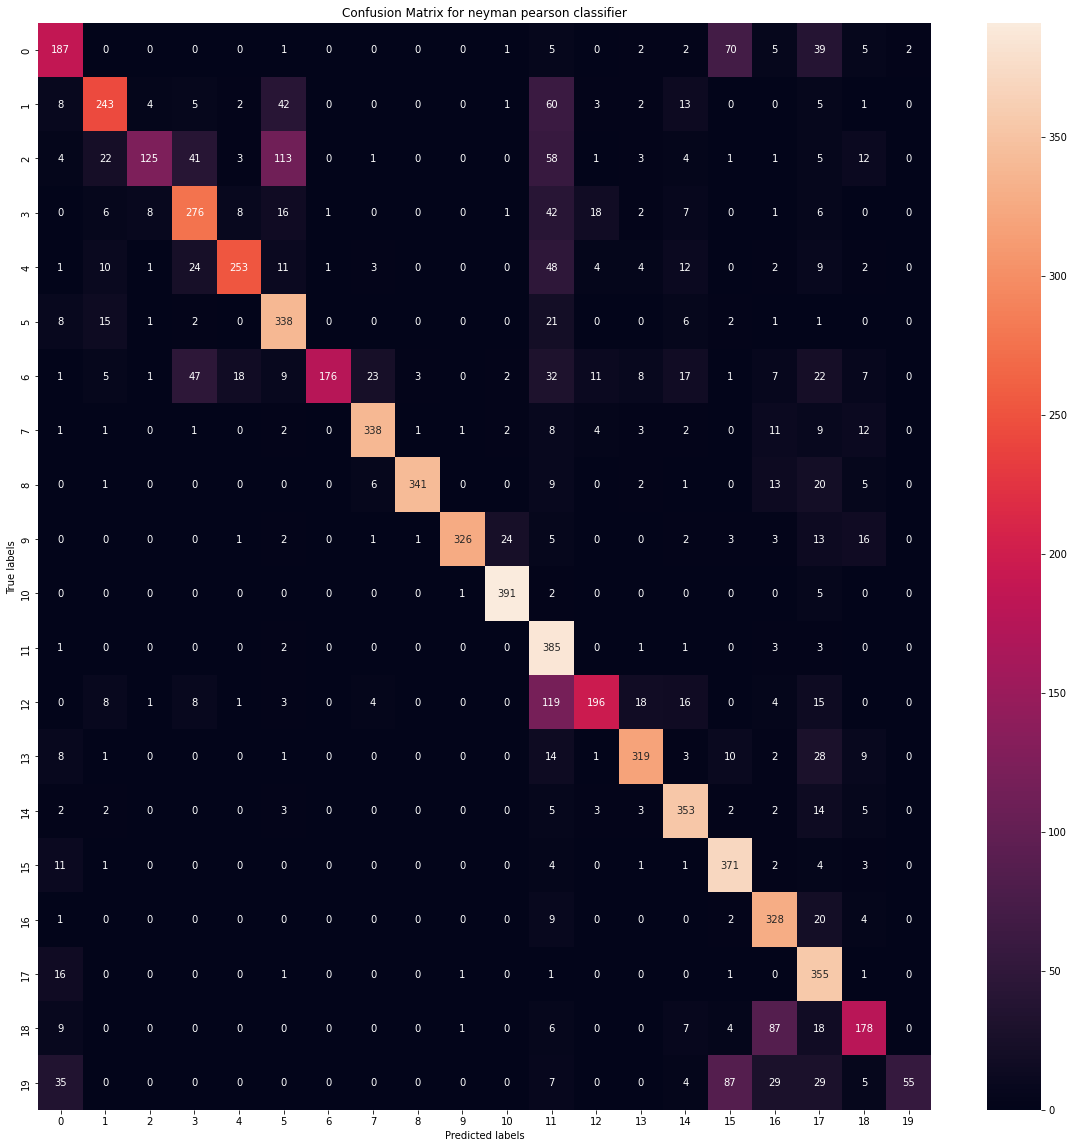

In [22]:
confusionMat=sklearn.metrics.confusion_matrix(y_test,y_pred)
confusionMat
ax= plt.subplots(figsize=(20,20))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for neyman pearson classifier'); 